Loading the fake news dataset...

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

In [3]:
## Loading the data
print("Loading Fake news data")
fakeDf = pandas.read_csv("fake.csv")
fakeDf['category'] = fakeDf['type']
fakeDf = fakeDf.dropna()

Loading Fake news data


In [4]:
fakeDf.groupby('type').count()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,category
type,,,,,,,,,,,,,,,,,,,,
bias,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271
bs,4064,4064,4064,4064,4064,4064,4064,4064,4064,4064,4064,4064,4064,4064,4064,4064,4064,4064,4064,4064
conspiracy,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163
fake,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
hate,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99
junksci,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97
state,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


### Here, when we look at all the other categories, we see that only 2 entries are tagged as Fake, while as observed in q2, over 80% of the observations are tagged as 'BS'. 

In [5]:
holdBackFraction = .2
print("Converting to vectors")
vecs_generated = lucem_illud.generateVecs(fakeDf)
dfTrain, dfTest = lucem_illud.trainTestSplit(vecs_generated)

Converting to vectors


### Again, we see that majority of the dataset is categorized as 'BS' and appears as blue circles.

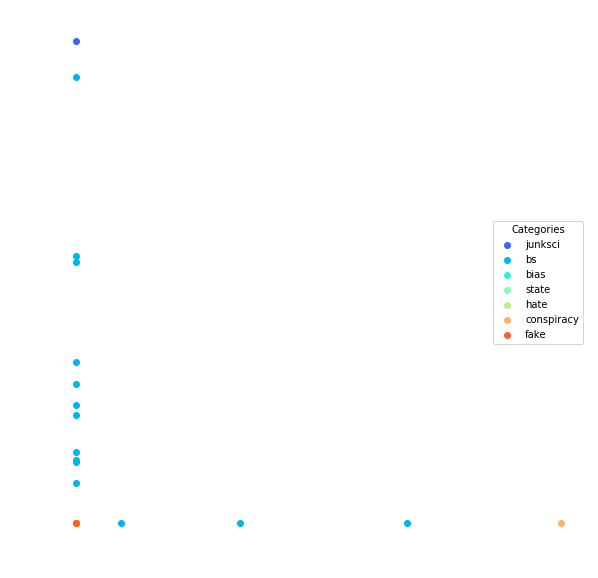

In [6]:
lucem_illud.plotter(dfTrain)

### Decision Tree

In [7]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(dfTrain['vect'], axis =0), dfTrain['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

To see what's going on visually with the classification: 

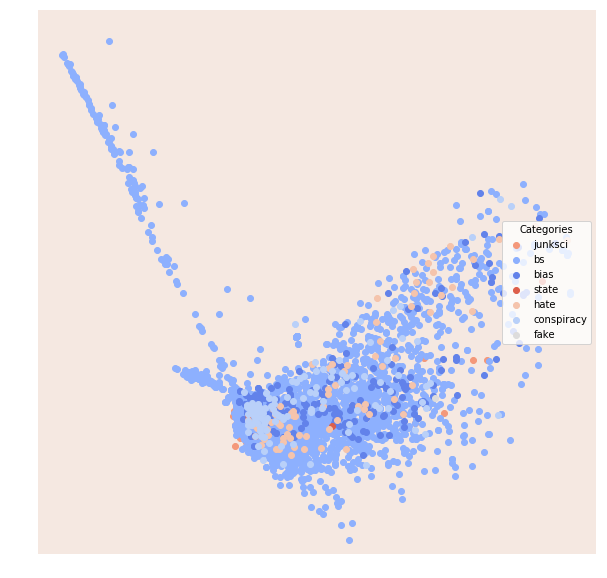

In [8]:
lucem_illud.plotregions(clf_tree, dfTrain)

In [9]:
lucem_illud.evaluateClassifier(clf_tree, dfTest)

/Users/sushmitavgopalan/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
junksci,0.785170,0.537047,0.010638,0.923077,0.571429
bs,0.627917,0.892462,0.106383,0.892580,0.996292
bias,0.582212,0.175887,0.044681,0.800000,0.166667
state,0.500000,0.001064,0.001064,0.000000,0.000000
hate,0.642857,0.301672,0.015957,1.000000,0.285714
conspiracy,0.602564,0.238107,0.032979,1.000000,0.205128
fake,0.500000,0.001064,0.001064,0.000000,0.000000


Lets look at accuracy:

In [10]:
sklearn.metrics.accuracy_score(dfTest['category'],clf_tree.predict(np.stack(dfTest['vect'], axis = 0)))

0.8936170212765957

What happens if we trim the tree? 
(We might be able to reduce overfitting)

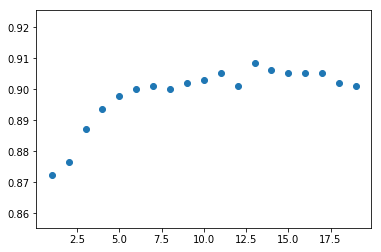

In [11]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(dfTrain['vect'], axis =0), dfTrain['category'])
    score = sklearn.metrics.accuracy_score(dfTest['category'], tree2.predict(np.stack(dfTest['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

In [12]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [13]:
bag.fit(np.stack(dfTrain['vect'], axis =0), dfTrain['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [18]:
lucem_illud.evaluateClassifier(bag, dfTest)

/Users/sushmitavgopalan/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
junksci,0.856599,0.676026,0.007447,0.937500,0.714286
bs,0.673100,0.904278,0.094681,0.904494,0.995056
bias,0.644152,0.276366,0.039362,0.823529,0.291667
state,0.500000,0.001064,0.001064,0.000000,0.000000
hate,0.642857,0.301672,0.015957,1.000000,0.285714
conspiracy,0.627650,0.263951,0.031915,0.909091,0.256410
fake,0.500000,0.001064,0.001064,0.000000,0.000000


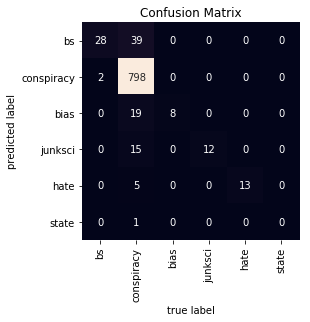

In [27]:
lucem_illud.plotConfusionMatrix(bag, dfTest)

Comparing the classification plot of the above two classification methods, random forest seems to distinguish between multiple categories better. Precision of classification also seem higher with random forests. Ensemble methods are meta-algorithms that combine several machine learning techniques into one predictive model in order to decrease variance (bagging), bias (boosting), or improve predictions (stacking).

# K-Nearest Neighbors

The K-Nearest neighbors classifier takes a simpler premise than those before: Find the closest labeled datapoint in set and "borrow" its label.

Let's use newsgroup data again.

Make a testing and training set:

In [23]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud.trainTestSplit(fakeDf, holdBackFraction=holdBackFraction)

Let's initialize our k-nearest neighbors classifier:

In [24]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

Let's try to classify using the TF-IDF vectors:

In [25]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [26]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [27]:
lucem_illud.evaluateClassifier(clf_knearest, train_ng_df)

/Users/sushmitavgopalan/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
junksci,0.551146,0.109775,0.018873,0.888889,0.102564
bs,0.565016,0.881383,0.117225,0.881397,0.999079
bias,0.556197,0.158408,0.050505,0.960000,0.112676
state,0.500000,0.001063,0.001063,0.000000,0.000000
hate,0.506250,0.033499,0.020999,1.000000,0.012500
conspiracy,0.625709,0.262399,0.025784,0.941176,0.251969
fake,0.500000,0.000532,0.000532,0.000000,0.000000


And lets look at the testing data

In [11]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.8765957446808511


Let's produce another confusion matrix:

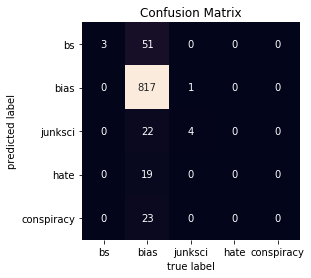

In [12]:
lucem_illud.plotConfusionMatrix(clf_knearest, test_ng_df)

You can produce the PCA space visual if you want, altough it can take a very long time, so we'll leave it optionally commented out:

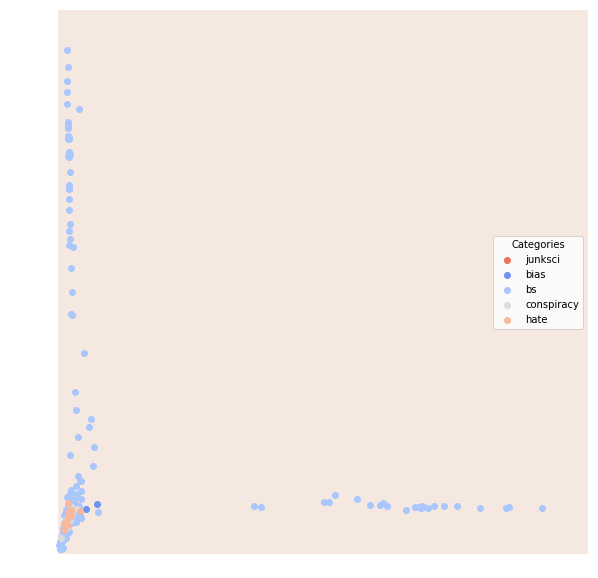

In [13]:
lucem_illud.plotregions(clf_knearest, test_ng_df)

### KNN and K-Means are not similar. KNN is a supervised learning algorithm for classification while K-means if a clustering algorithm used in unsupervised learning.

# SVMs

Now we will examine Support Vector Machines, an approach that creates the partition that preserves the "maximum margin" between classes.

We will use the same fake news data

In [28]:
#tokenize and normalize
fakeDf['tokenized_text'] = fakeDf['text'].apply(lambda x: nltk.word_tokenize(x))
fakeDf['normalized_text'] = fakeDf['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic))

We will tf.idf the data to make our vectors:

In [29]:
fakeTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
fakeTFVects = fakeTFVectorizer.fit_transform([' '.join(l) for l in fakeDf['normalized_text']])
fakeDf['vect'] = [np.array(v).flatten() for v in fakeTFVects.todense()]

Initilize the model and make a train test split:

In [30]:
holdBackFraction = .2
train_redditDf, test_redditDf = lucem_illud.trainTestSplit(fakeDf, holdBackFraction=holdBackFraction)

In [31]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

...and consider the results:

In [32]:
lucem_illud.evaluateClassifier(clf_svm, test_redditDf)

/Users/sushmitavgopalan/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
junksci,0.517857,0.064438,0.028723,1.000000,0.035714
bs,0.593191,0.873534,0.125532,0.873626,0.996241
bias,0.644851,0.292755,0.046809,0.850000,0.293103
state,0.500000,0.001064,0.001064,0.000000,0.000000
hate,0.500000,0.022340,0.022340,0.000000,0.000000
conspiracy,0.636364,0.298259,0.025532,1.000000,0.272727
fake,0.500000,0.001064,0.001064,0.000000,0.000000


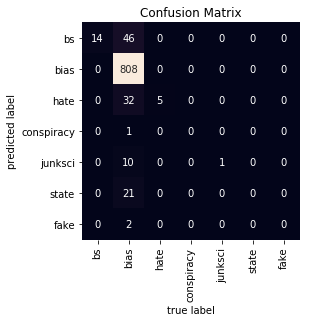

In [33]:
lucem_illud.plotConfusionMatrix(clf_svm, test_redditDf)

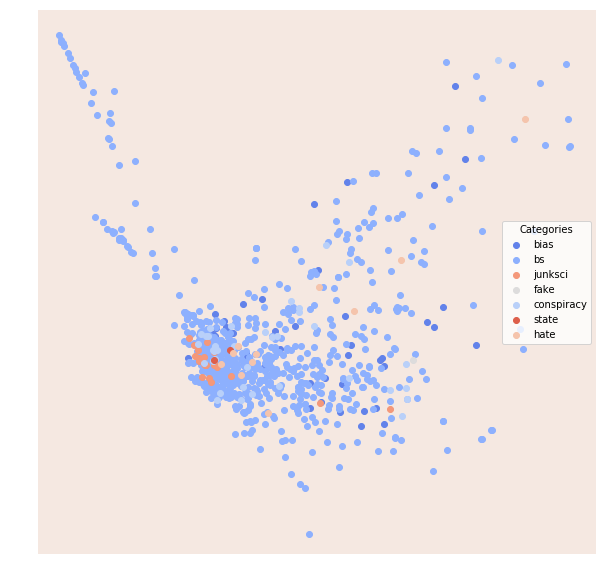

In [34]:
lucem_illud.plotregions(clf_svm, test_redditDf)

# Neural Nets



In [33]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [34]:
lucem_illud.evaluateClassifier(clf_nn, test_redditDf)

/Users/sushmitavgopalan/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
junksci,0.571429,0.168389,0.025532,1.000000,0.142857
bs,0.686143,0.899571,0.105319,0.900344,0.984962
bias,0.761006,0.423223,0.040426,0.738095,0.534483
state,1.000000,1.000000,0.000000,1.000000,1.000000
hate,0.594694,0.170466,0.019149,0.800000,0.190476
conspiracy,0.695867,0.362691,0.023404,0.866667,0.393939
fake,0.500000,0.001064,0.001064,0.000000,0.000000


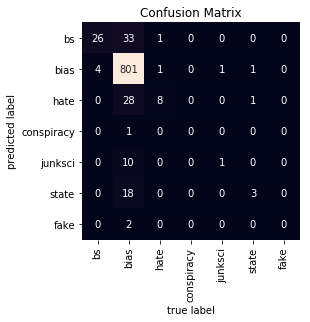

In [37]:
lucem_illud.plotConfusionMatrix(clf_nn, test_redditDf)

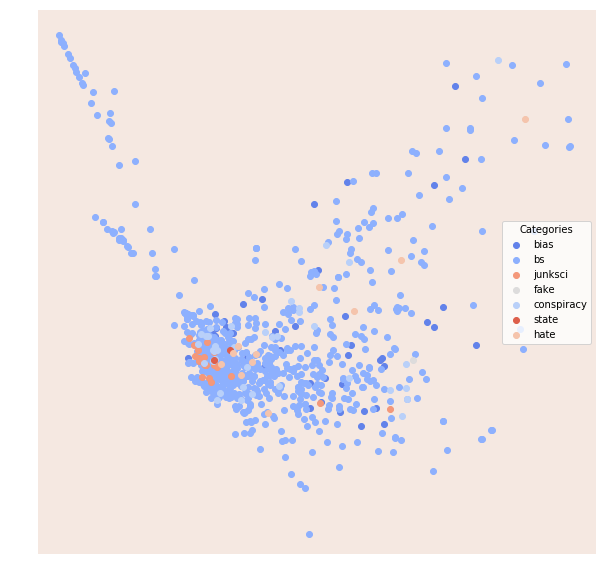

In [38]:
lucem_illud.plotregions(clf_nn, test_redditDf)

### Collaborated with Arvind Ilamaran in pursuit of final project. All code and written output are our own
